# Animal Welfare Calculator
* See this doc for details: https://docs.google.com/document/d/1uFxgcfYCh269Ooe-LQLaPOhOke4lrcRKPZYlZogDW34/edit?tab=t.0

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%config InlineBackend.figure_format='retina'

In [128]:
blue='#3ac3f2'
pink='#ed2685'
gray='#aaaaaa'
lightgray='#cccccc'
verylightgray='#dddddd'
yellow='#f1d321'
orange='#f58032'
green='#12ed9d'
red='#ed1262'
purple='#9D75FE'

# Farmed animals

In [441]:
df = pd.read_excel('Animal welfare calculator.xlsx', sheet_name='Farmed Animals')

### Replicate foodimacts.org
As a test, compare these results to the <rect> widths of the bars on the https://foodimpacts.org/ website. 

Before comparing, make sure that:
* You have moved the Welfare slider to 99%
* Shrimp is still in the df. (It is deleted later in this notebook.)

Shrimp should be 460, hen egg should be about 23.8, and farmed salmong should be about 15.1. The small, <5% differences between my test results and foodimpacts is because the slider won't go to 100%.

In [443]:
assert 'shrimp' in df['species'].values, 'Shrimp is not in the df. Make sure to include shrimp for this test. May require re-reading the file.'
df['foodimpacts_scores'] = df['lifespan_days']/df['food_kg'] * df['kg_per_2k_calories'] * df['welfare_range'] * df['elasticity_ace']
df['foodimpacts_scores_normalized'] = df['foodimpacts_scores']/df['foodimpacts_scores'].max() * 460
df[['species', 'foodimpacts_scores_normalized']].sort_values(by='foodimpacts_scores_normalized', ascending=False)

,species,foodimpacts_scores_normalized
0,shrimp,460.000000
1,caged_hen,22.737759
3,farmed_salmon,14.628563
2,broiler,6.573502
4,turkey,3.364759
6,lamb,1.295193
5,pig,0.942082
8,beef_cow,0.603679
7,dairy_cow,0.071829


### Calculate suffering per 2000 calories

In [490]:
df['animals_per_2000_calories'] = 1 / df['food_kg'] * df['kg_per_2k_calories']
df['days_per_2000_calories'] = df['animals_per_2000_calories'] * df['lifespan_days']
df['suffering_per_day'] = df['unadjusted_suffering_per_day'] * df['welfare_range']
df['suffering_per_2000_calories'] = df['suffering_per_day'] * df['days_per_2000_calories']
df = df.sort_values(by='suffering_per_2000_calories', ascending=False).reset_index(drop=True)
df = df[df['label'] != 'Shrimp']
df

,species,label,food_label,lifespan_days,food_kg,elasticity_ace,elasticity_cbp,kg_per_2k_calories,welfare_range,unadjusted_suffering_per_day,suffering_per_day,animals_per_2000_calories,days_per_2000_calories,suffering_per_2000_calories,foodimpacts_scores,foodimpacts_scores_normalized
0,caged_hen,Caged hen (eggs),Caged eggs,504,20.50,0.91,0.91,1.2903,0.332,3.0,0.996,0.062941,31.722498,31.595608,9.584001,22.737759
1,broiler,Chicken,Chicken,42,1.83,0.30,0.76,1.2121,0.332,3.0,0.996,0.662350,27.818689,27.707414,2.770741,6.573502
2,farmed_salmon,Salmon,Salmon,720,2.73,0.43,0.43,0.9709,0.056,1.5,0.084,0.355641,256.061538,21.509169,6.165962,14.628563
3,turkey,Turkey,Turkey,126,10.30,0.33,0.76,1.0582,0.332,3.0,0.996,0.102738,12.944971,12.893191,1.418251,3.364759
4,pig,Pig,Pig,183,91.10,0.57,0.74,0.6734,0.515,3.0,1.545,0.007392,1.352714,2.089942,0.397089,0.942082
5,lamb,Lamb,Lamb,180,60.00,0.50,0.68,0.7067,0.515,0.0,0.000,0.011778,2.120100,0.000000,0.545926,1.295193
6,dairy_cow,Dairy cow,Milk,2009,50420.00,0.45,0.56,3.2787,0.515,-1.0,-0.515,0.000065,0.130641,-0.067280,0.030276,0.071829
7,beef_cow,Beef cow,Beef,402,339.00,0.50,0.68,0.8333,0.515,-1.0,-0.515,0.002458,0.988161,-0.508903,0.254451,0.603679


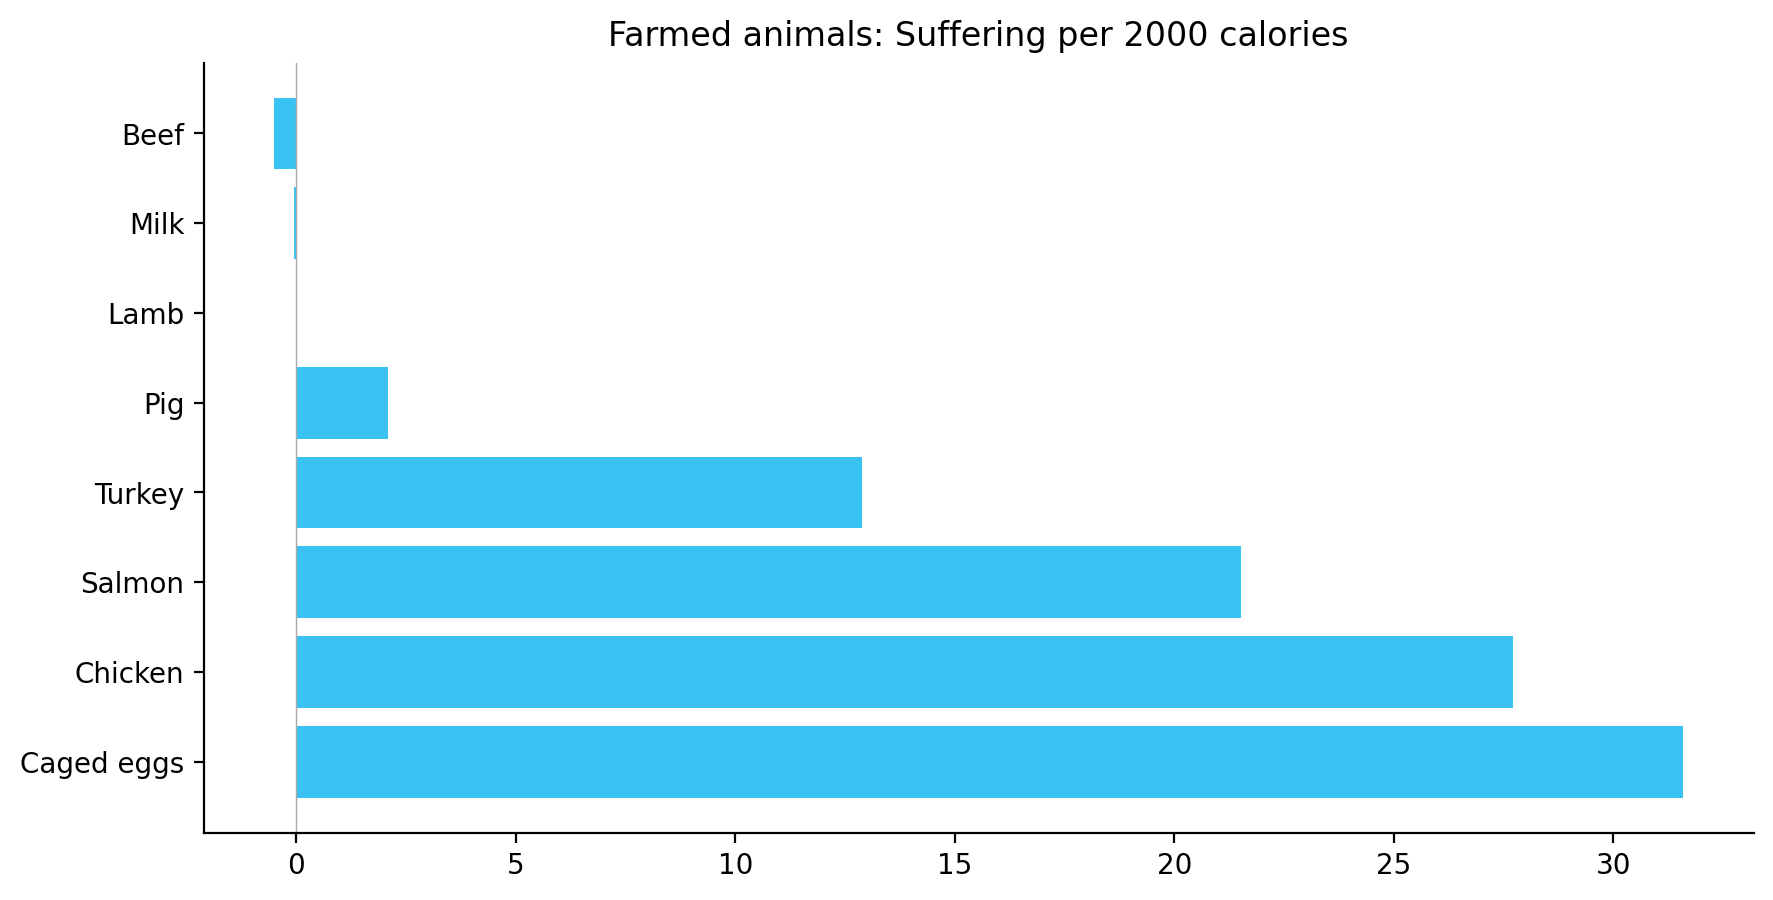

In [468]:
plt.figure(figsize=(10, 5))
plt.barh(df['food_label'], df['suffering_per_2000_calories'], color=blue)
plt.axvline(x=0, color=gray, linewidth=0.5)
plt.title('Farmed animals: Suffering per 2000 calories')
sns.despine()


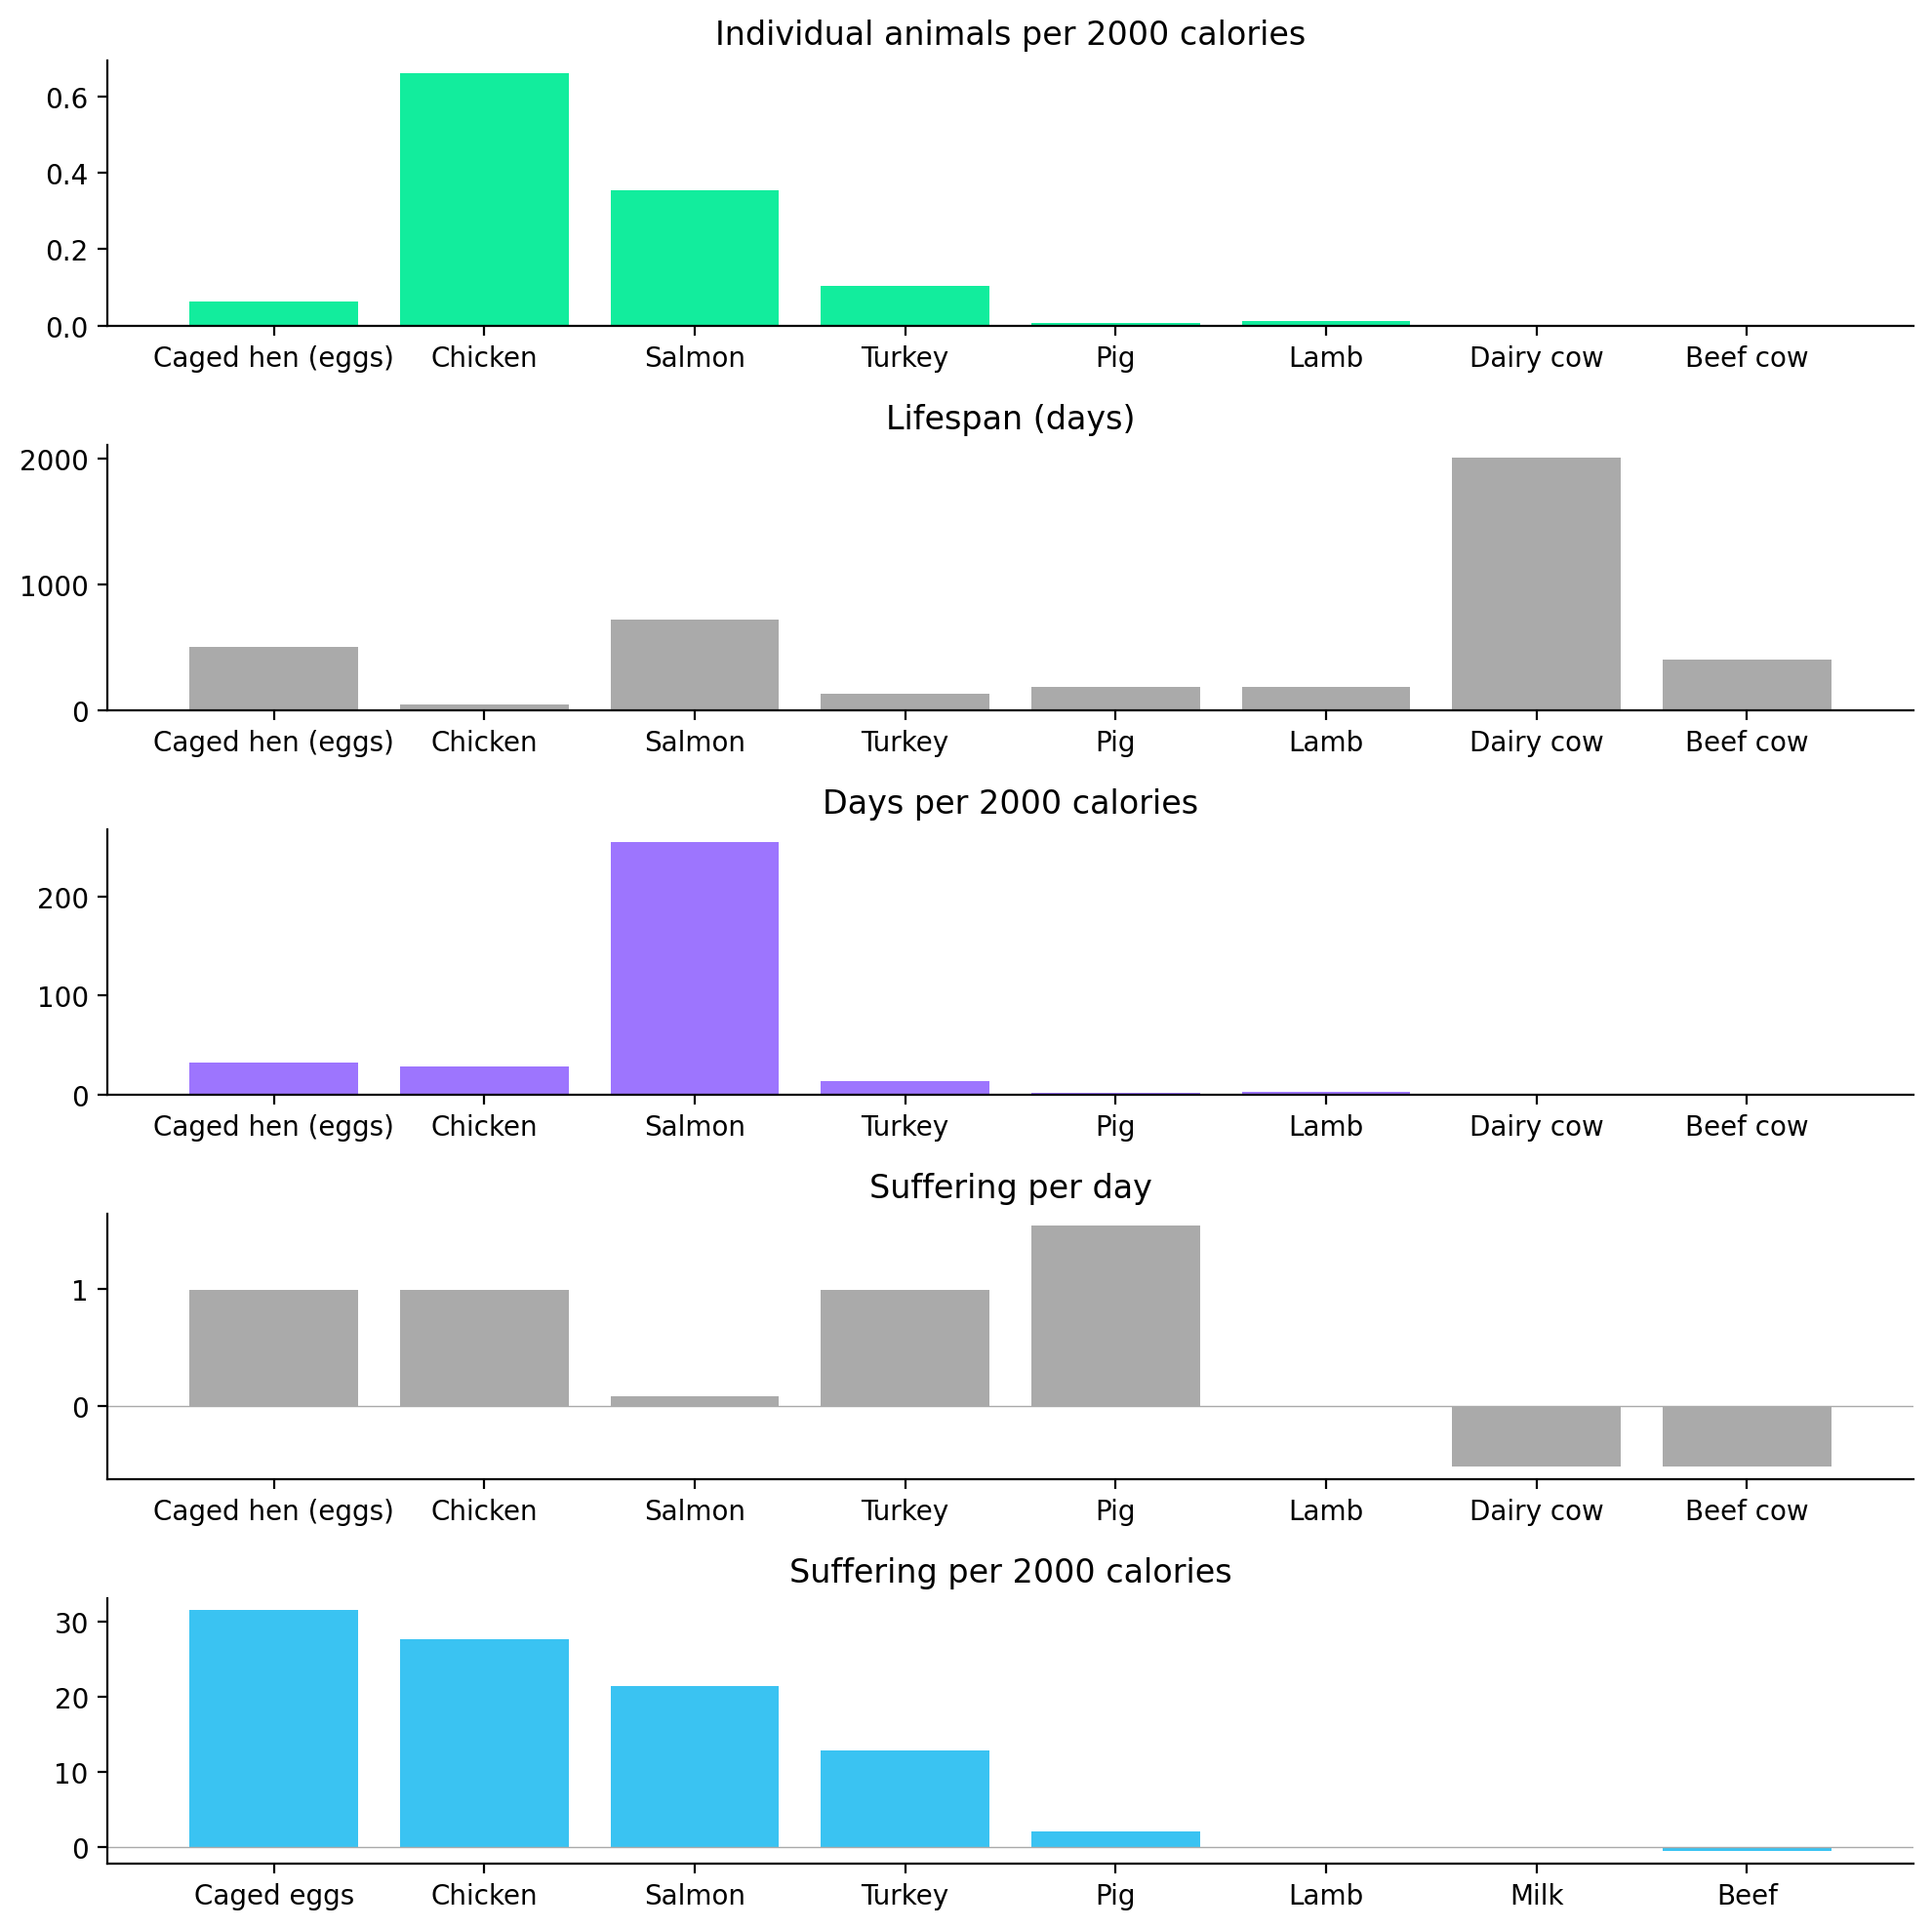

In [473]:
fig, axes = plt.subplots(5, 1, figsize=(10, 10))

plt.sca(axes[0]); plt.bar(df['label'], df['animals_per_2000_calories'], color=green)
plt.title('Individual animals per 2000 calories')

plt.sca(axes[1]); plt.bar(df['label'], df['lifespan_days'], color=gray)
plt.title('Lifespan (days)')

plt.sca(axes[2]); plt.bar(df['label'], df['days_per_2000_calories'], color=purple)
plt.title('Days per 2000 calories')

plt.sca(axes[3]); plt.bar(df['label'], df['suffering_per_day'], color=gray)
plt.axhline(y=0, color=gray, linewidth=0.5)
plt.title('Suffering per day')

plt.sca(axes[4]); plt.bar(df['food_label'], df['suffering_per_2000_calories'], color=blue)
plt.axhline(y=0, color=gray, linewidth=0.5)
plt.title('Suffering per 2000 calories')
sns.despine()
plt.tight_layout()


# Wild animals

In [484]:
meat_fraction_of_weight = 0.5
energy_per_100g = 150

In [485]:
wild_df = pd.read_excel('Animal welfare calculator.xlsx', sheet_name='Wild Animals')
wild_df = wild_df[['species', 'weight_kg', 'natural_lifespan_years']]
wild_df = wild_df.dropna()


In [486]:
tuna_weight_kg = wild_df[wild_df['species'] == 'Yellowfin tuna']['weight_kg'].values[0]

In [487]:
wild_df['moral_worth_per_year'] = (wild_df['weight_kg']/tuna_weight_kg)**0.1
wild_df['energy_kcal'] = wild_df['weight_kg'] * meat_fraction_of_weight * 10 * energy_per_100g
wild_df['years_lost'] = wild_df['natural_lifespan_years']/2
wild_df['animals_per_2000_kcal'] = 1 / (wild_df['energy_kcal']/2000)
wild_df['life_years_deprived_per_2000_kcal'] = wild_df['animals_per_2000_kcal'] * wild_df['years_lost']
wild_df['moral_worth_adjusted_life_years_deprived_per_2000_kcal'] = wild_df['life_years_deprived_per_2000_kcal'] * wild_df['moral_worth_per_year']
wild_df = wild_df.sort_values(by='moral_worth_adjusted_life_years_deprived_per_2000_kcal', ascending=False).reset_index(drop=True)
wild_df

,species,weight_kg,natural_lifespan_years,moral_worth_per_year,energy_kcal,years_lost,animals_per_2000_kcal,life_years_deprived_per_2000_kcal,moral_worth_adjusted_life_years_deprived_per_2000_kcal
0,Herring (Atlantic),0.22686,7.5,0.594939,170.145191,3.75,11.754667,44.08,26.22493
1,Mackerel,0.680581,10.0,0.664026,510.435572,5.00,3.918222,19.591111,13.009001
2,Coho salmon,4.537205,3.5,0.802742,3402.903811,1.75,0.587733,1.028533,0.825646
3,King salmon,11.343013,5.0,0.879771,8507.259525,2.50,0.235093,0.587733,0.517071
4,Yellowfin tuna,40.834846,6.5,1.0,30626.134305,3.25,0.065304,0.212237,0.212237


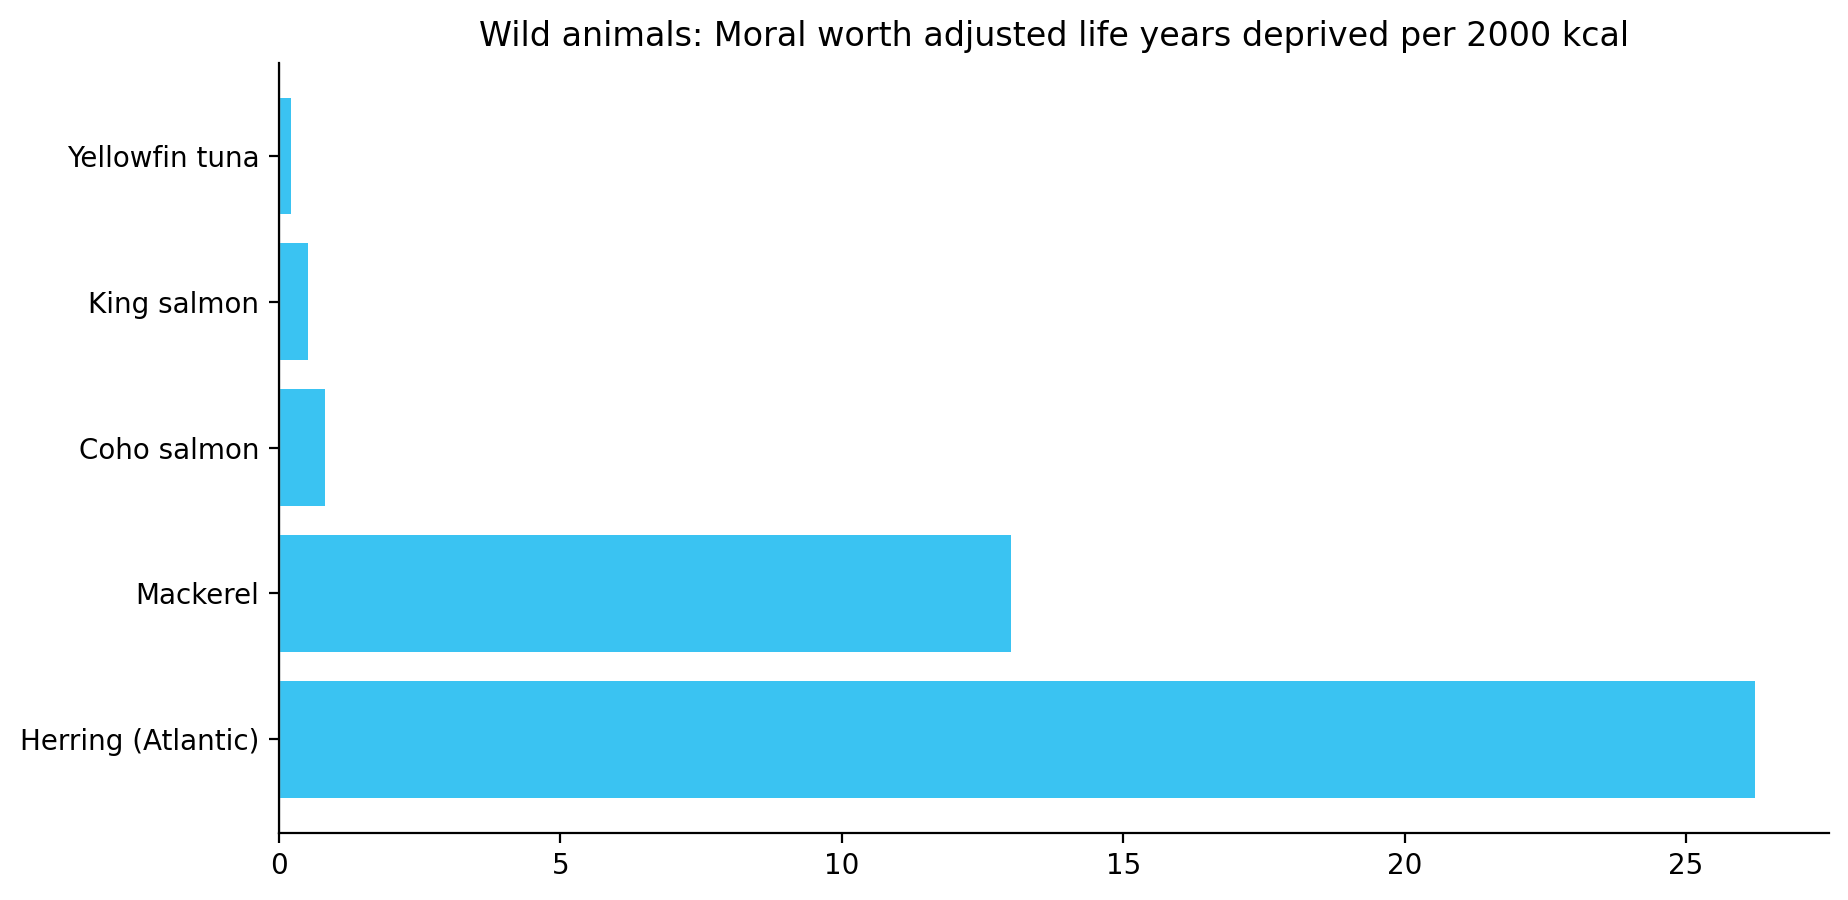

In [488]:
plt.figure(figsize=(10, 5))
plt.barh(wild_df['species'], wild_df['moral_worth_adjusted_life_years_deprived_per_2000_kcal'], color=blue)
plt.axvline(x=0, color=gray, linewidth=0.5)
plt.title('Wild animals: Moral worth adjusted life years deprived per 2000 kcal')
sns.despine()

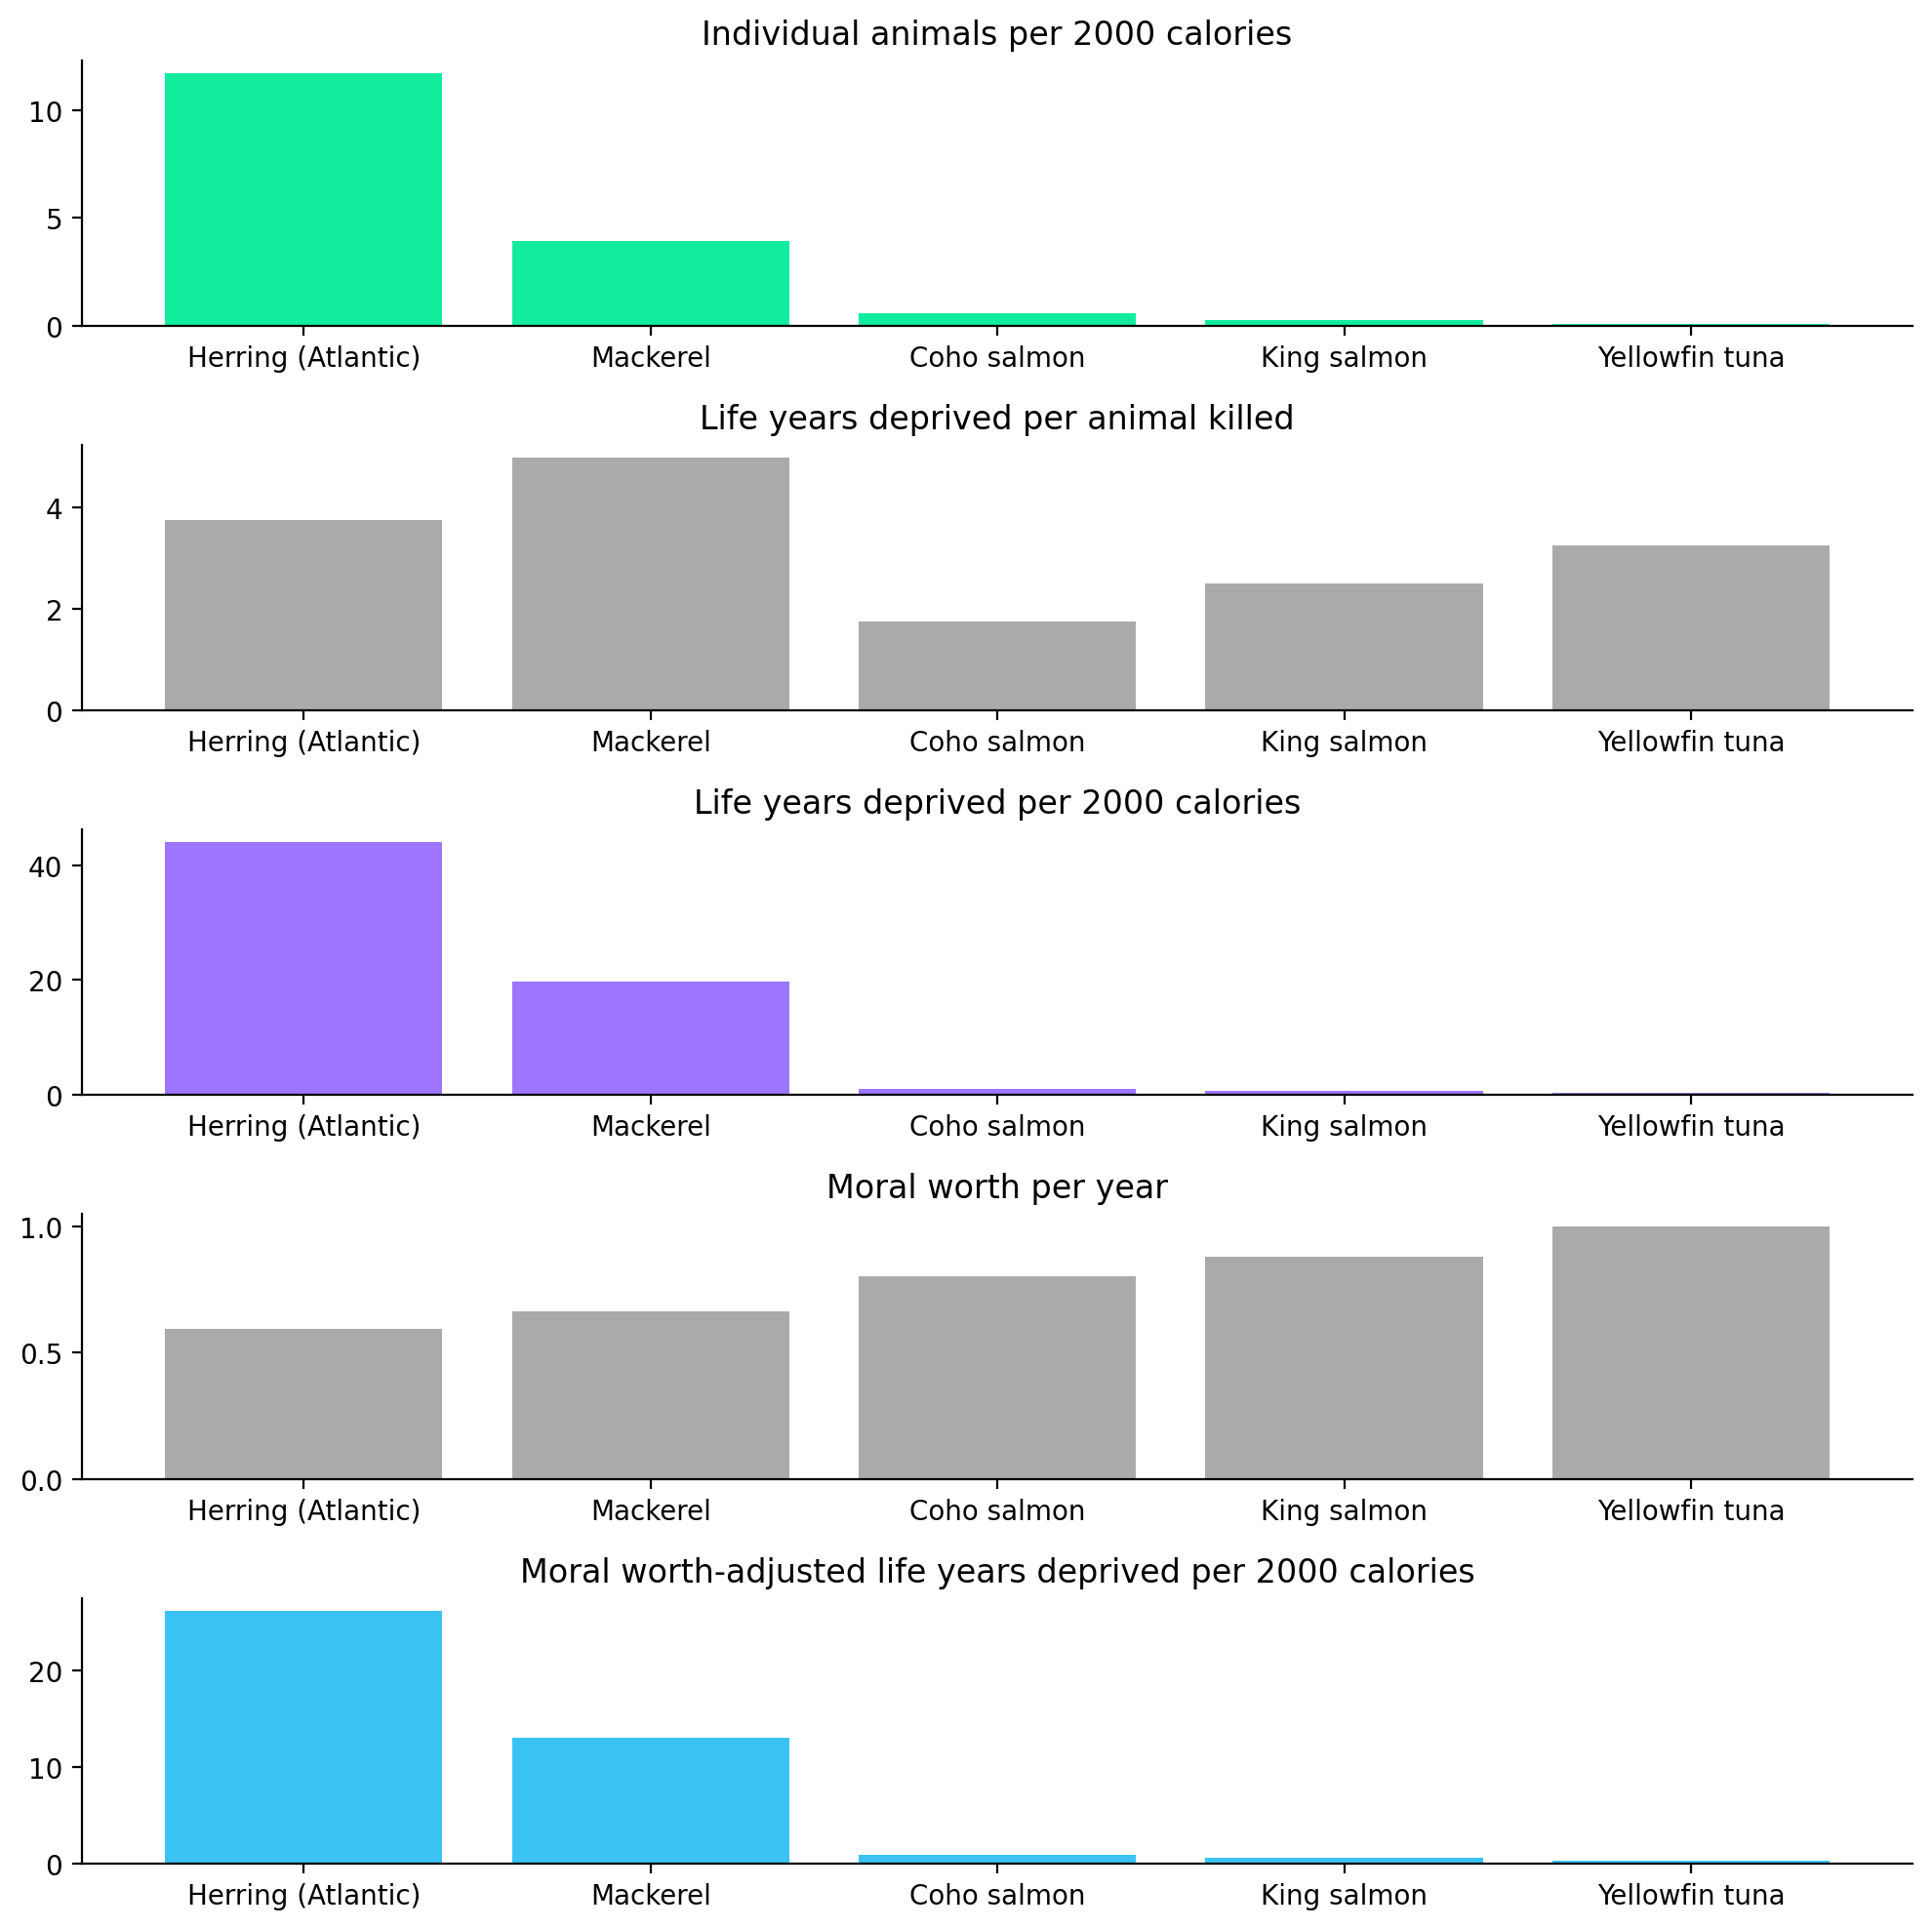

In [489]:
fig, axes = plt.subplots(5, 1, figsize=(10, 10))

plt.sca(axes[0]); plt.bar(wild_df['species'], wild_df['animals_per_2000_kcal'], color=green)
plt.axhline(y=0, color=gray, linewidth=0.5)
plt.title('Individual animals per 2000 calories')

plt.sca(axes[1]); plt.bar(wild_df['species'], wild_df['years_lost'], color=gray)
plt.axhline(y=0, color=gray, linewidth=0.5)
plt.title('Life years deprived per animal killed')

plt.sca(axes[2]); plt.bar(wild_df['species'], wild_df['life_years_deprived_per_2000_kcal'], color=purple)
plt.axhline(y=0, color=gray, linewidth=0.5)
plt.title('Life years deprived per 2000 calories')

plt.sca(axes[3]); plt.bar(wild_df['species'], wild_df['moral_worth_per_year'], color=gray)
plt.axhline(y=0, color=gray, linewidth=0.5)
plt.title('Moral worth per year')

plt.sca(axes[4]); plt.bar(wild_df['species'], wild_df['moral_worth_adjusted_life_years_deprived_per_2000_kcal'], color=blue)
plt.title('Moral worth-adjusted life years deprived per 2000 calories')
sns.despine()
plt.tight_layout()